<a href="https://colab.research.google.com/github/JinshiAshok/ML-PROJECT/blob/main/TELECOM_CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`TELECOM CUSTOMER CHURN PREDICTION`**

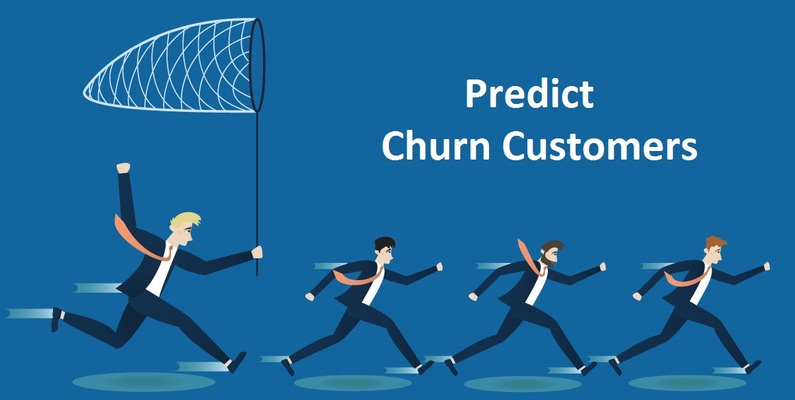

**The aim of this project is to analyze customer demographics, services, tenure and other variables to predict whether a particular customer will churn or not.**

## `DATA DICTIONARY`

> CustomerIDUnique --- customer ID






>Gender--- Customer's gender


> SeniorCitizen---- Whether the customer is a senior citizen or not


> Partner--- Whether the customer has a partner or not (Yes, No)





> Dependents--- Whether the customer has dependents or not (Yes, No)

> Tenure--- Number of months the customer has stayed with the company

> Phone--- ServiceWhether the customer has a phone service or not (Yes, No)

> MultipleLines--- Whether the customer has multiple lines or not (Yes, No, No phone
service)

> InternetService--- Customer’s internet service provider (DSL, Fiber optic, No)

> OnlineSecurity--- Whether the customer has online security or not (Yes, No, No internet
service)

> OnlineBackup--- Whether the customer has online backup or not (Yes, No, No internet
service)

>DeviceProtection--- Whether the customer has device protection or not (Yes, No, No internet

> TechSupport--- Whether the customer has tech support or not (Yes, No, No internet
service)

> StreamingTV--- Whether the customer has streaming TV or not (Yes, No, No internet
service)







>Contract--- The contract term of the customer (Month-to-month, One year, Two year)

>PaperlessBilling--- Whether the customer has paperless billing or not (Yes, No)

> Payment--- MethodThe customer’s payment method (Electronic check, Mailed check, Bank
transfer (automatic), Credit card (automatic))

> MonthlyCharges--- The amount charged to the customer monthly

> TotalCharges--- The total amount charged to the customer


>Churn--- Whether the customer churned or not (Yes or No)








































# **`Import libraries` :-**
**Data Analysis and visualization libraries :**
importing libraries to set up a Python environment for data analysis and visualization.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [ ]:
#loading file using pandas dataframe
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.xls")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


**Statistical description of Categorical features**

In [ ]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


# `FEATURE ENGINEERING`

In [ ]:
#to check no of duplicate rows
df.duplicated().sum()

0

In [ ]:
  #covert 'TotalCharges' in to numerical datatype(some row contains " ")
  df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)
  df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#checking for null values

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

11 missing datapoints can be observed in the Total Charges column.

In [ ]:
#Removal of rows with missing data
df.dropna(inplace=True)
df.reset_index()



,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#checking number of unique value in each column
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:
#to print unique value of each column
cols=df.columns
for i in cols:
  print(i, df[i].unique(), '\n')

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

gender ['Female' 'Male'] 

SeniorCitizen [0 1] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer

In [ ]:
df['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [ ]:
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [ ]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [ ]:
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [ ]:
#create a list for each object column

lst=df.select_dtypes(include='object').columns.tolist()
lst

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
#Uploading wrongly labeled data points : some data cells has 'No phone servicee and : 'No ,internetservice' instead of 'No'
for i in lst:
  df[i]=df[i].replace('No phone service','No')
  df[i]=df[i].replace('No internet service','No')



In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df['customerID'].value_counts()

7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64

In [ ]:
#large no of unique values so drop customer ID

df.drop(['customerID'],axis=1,inplace=True)


# **Exploratory Data Analysis**



### VISUALIZATION OF DATA



---



for better understanding of data and to find relationship between dependent variables and the target variable




Text(0, 0.5, 'Customer count')

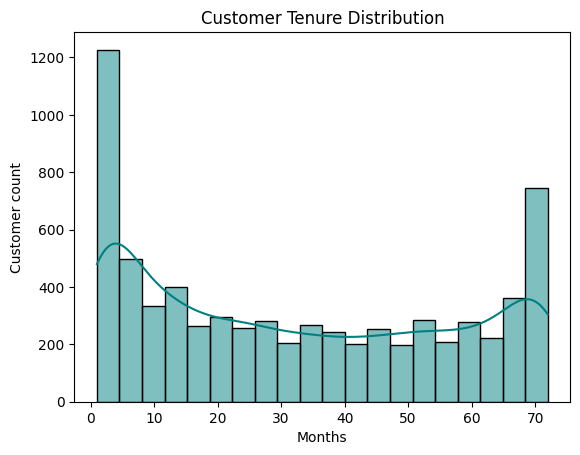

In [ ]:
#distribution of customer tenure
# plt.figure(figsize=(12,4))
sns.histplot(df['tenure'],color='teal',edgecolor='black',bins=20,kde=True)
plt.title('Customer Tenure Distribution')
plt.xlabel('Months')
plt.ylabel('Customer count')

In [ ]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7032, dtype: int64

Text(0, 0.5, 'Count')

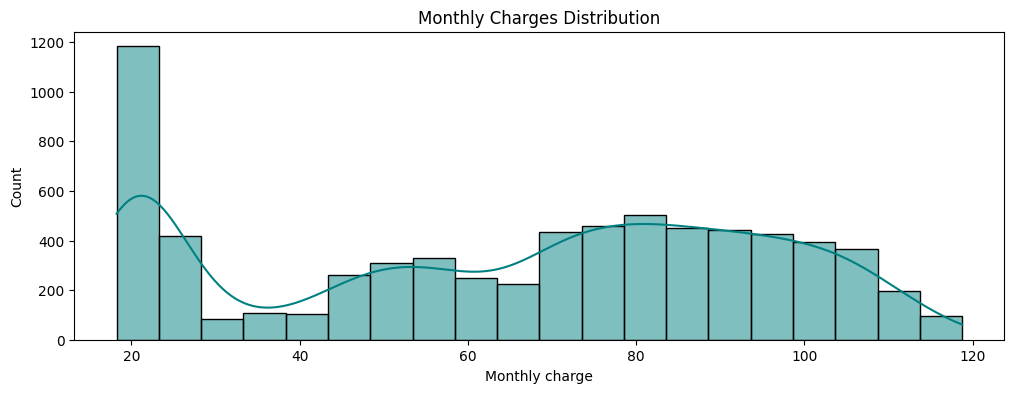

In [ ]:
#distribution of monthly charges
plt.figure(figsize=(12,4))
sns.histplot(df['MonthlyCharges'],color='teal',edgecolor='black',bins=20,kde=True)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly charge')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

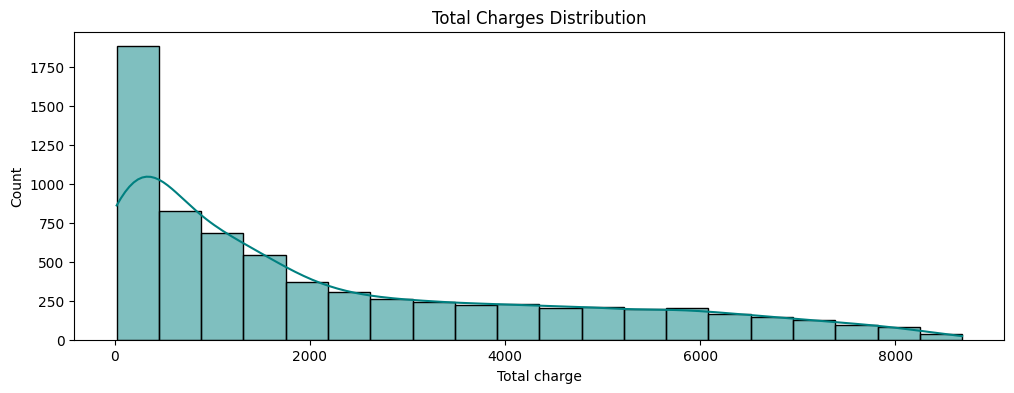

In [ ]:
#distribution of total charges
plt.figure(figsize=(12,4))
sns.histplot(df['TotalCharges'],color='teal',edgecolor='black',bins=20,kde=True)
plt.title('Total Charges Distribution')
plt.xlabel('Total charge')
plt.ylabel('Count')

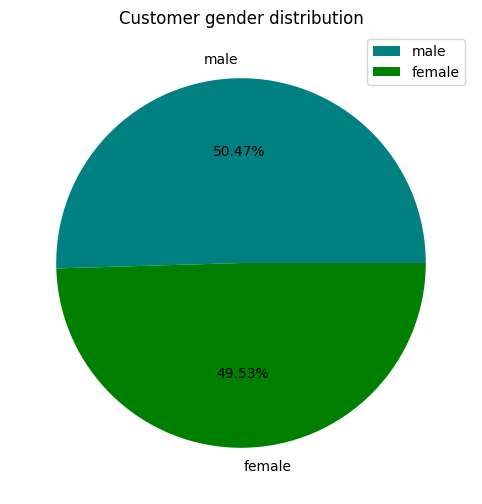

In [ ]:
#customer gender distribution
plt.figure(figsize=(10,6))
color=['teal','green']
label=['male','female']
plt.pie(df['gender'].value_counts(),labels=label,colors=color,autopct='%1.2f%%')
plt.title('Customer gender distribution')

plt.legend()


Gender distribution is approximately the same between males and females





**COUNT OF CUSTOMER CHURN**






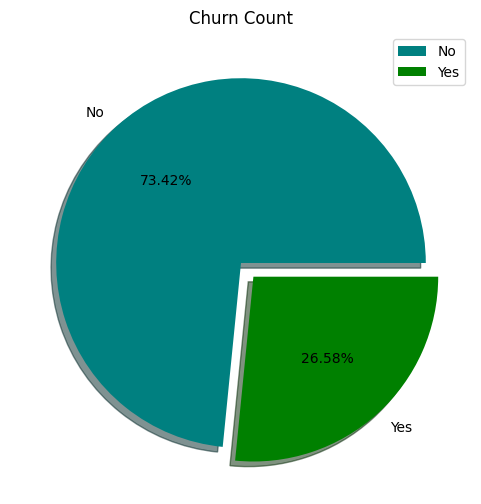

In [ ]:
plt.figure(figsize=(14,6))
color=['teal','green']
plt.pie(x=  df['Churn'].value_counts(),labels= df['Churn'].unique(),colors=color,autopct='%1.2f%%',explode=[0,0.1],shadow=True)
plt.title('Churn Count')
plt.legend()

In the dataset, the number of churning customers is very less as compared to non
churning. Only 26.54% churnned from the telecom company.This could be a potential
proof, that company is quite good at retaning its customers.

**The visualization customer churn based on each features**

**CUSTOMER DEMOGRAPHICS AND CHURN**




Text(0.5, 1.0, 'Dependents And Churn')

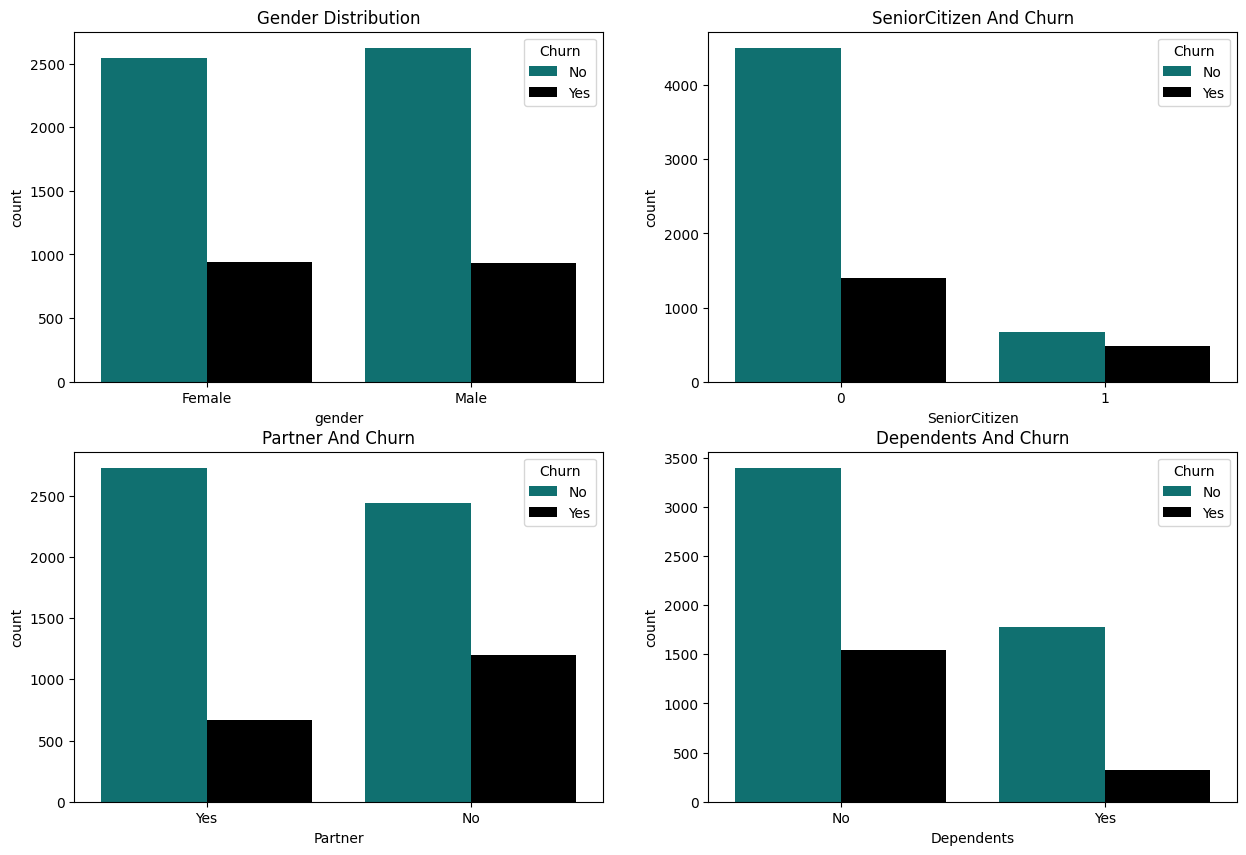

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(15,10))


#gender distribution
color=['teal','black']
sns.countplot(x='gender',data=df,hue='Churn',palette=color,ax=ax[0,0])
ax[0,0].set_title('Gender Distribution')

#senior citizen distriburion

sns.countplot(x='SeniorCitizen',data=df,hue='Churn',palette=color,ax=ax[0,1])
ax[0,1].set_title('SeniorCitizen And Churn')

#partner distribution

sns.countplot(x='Partner',data=df,hue='Churn',palette=color,ax=ax[1,0])
ax[1,0].set_title('Partner And Churn')

#Dependents distribution

sns.countplot(x='Dependents',data=df,hue='Churn',palette=color,ax=ax[1,1])
ax[1,1].set_title('Dependents And Churn')




from above graph it is clear that male and female have same churn count.However, the
senior citizens have a lesser churn count as compared to non senior citizens,The customers with no partners have higher churn count as compared
to customers with partners.
 customers with no dependents have higher churn
count as compared to customers with dependents.

**CUSTOMER SERVICES AND CHURN**



These graphs visualizes the relation between customer churn based on services opted by the customer

Text(0.5, 1.0, 'StreamingMovies')

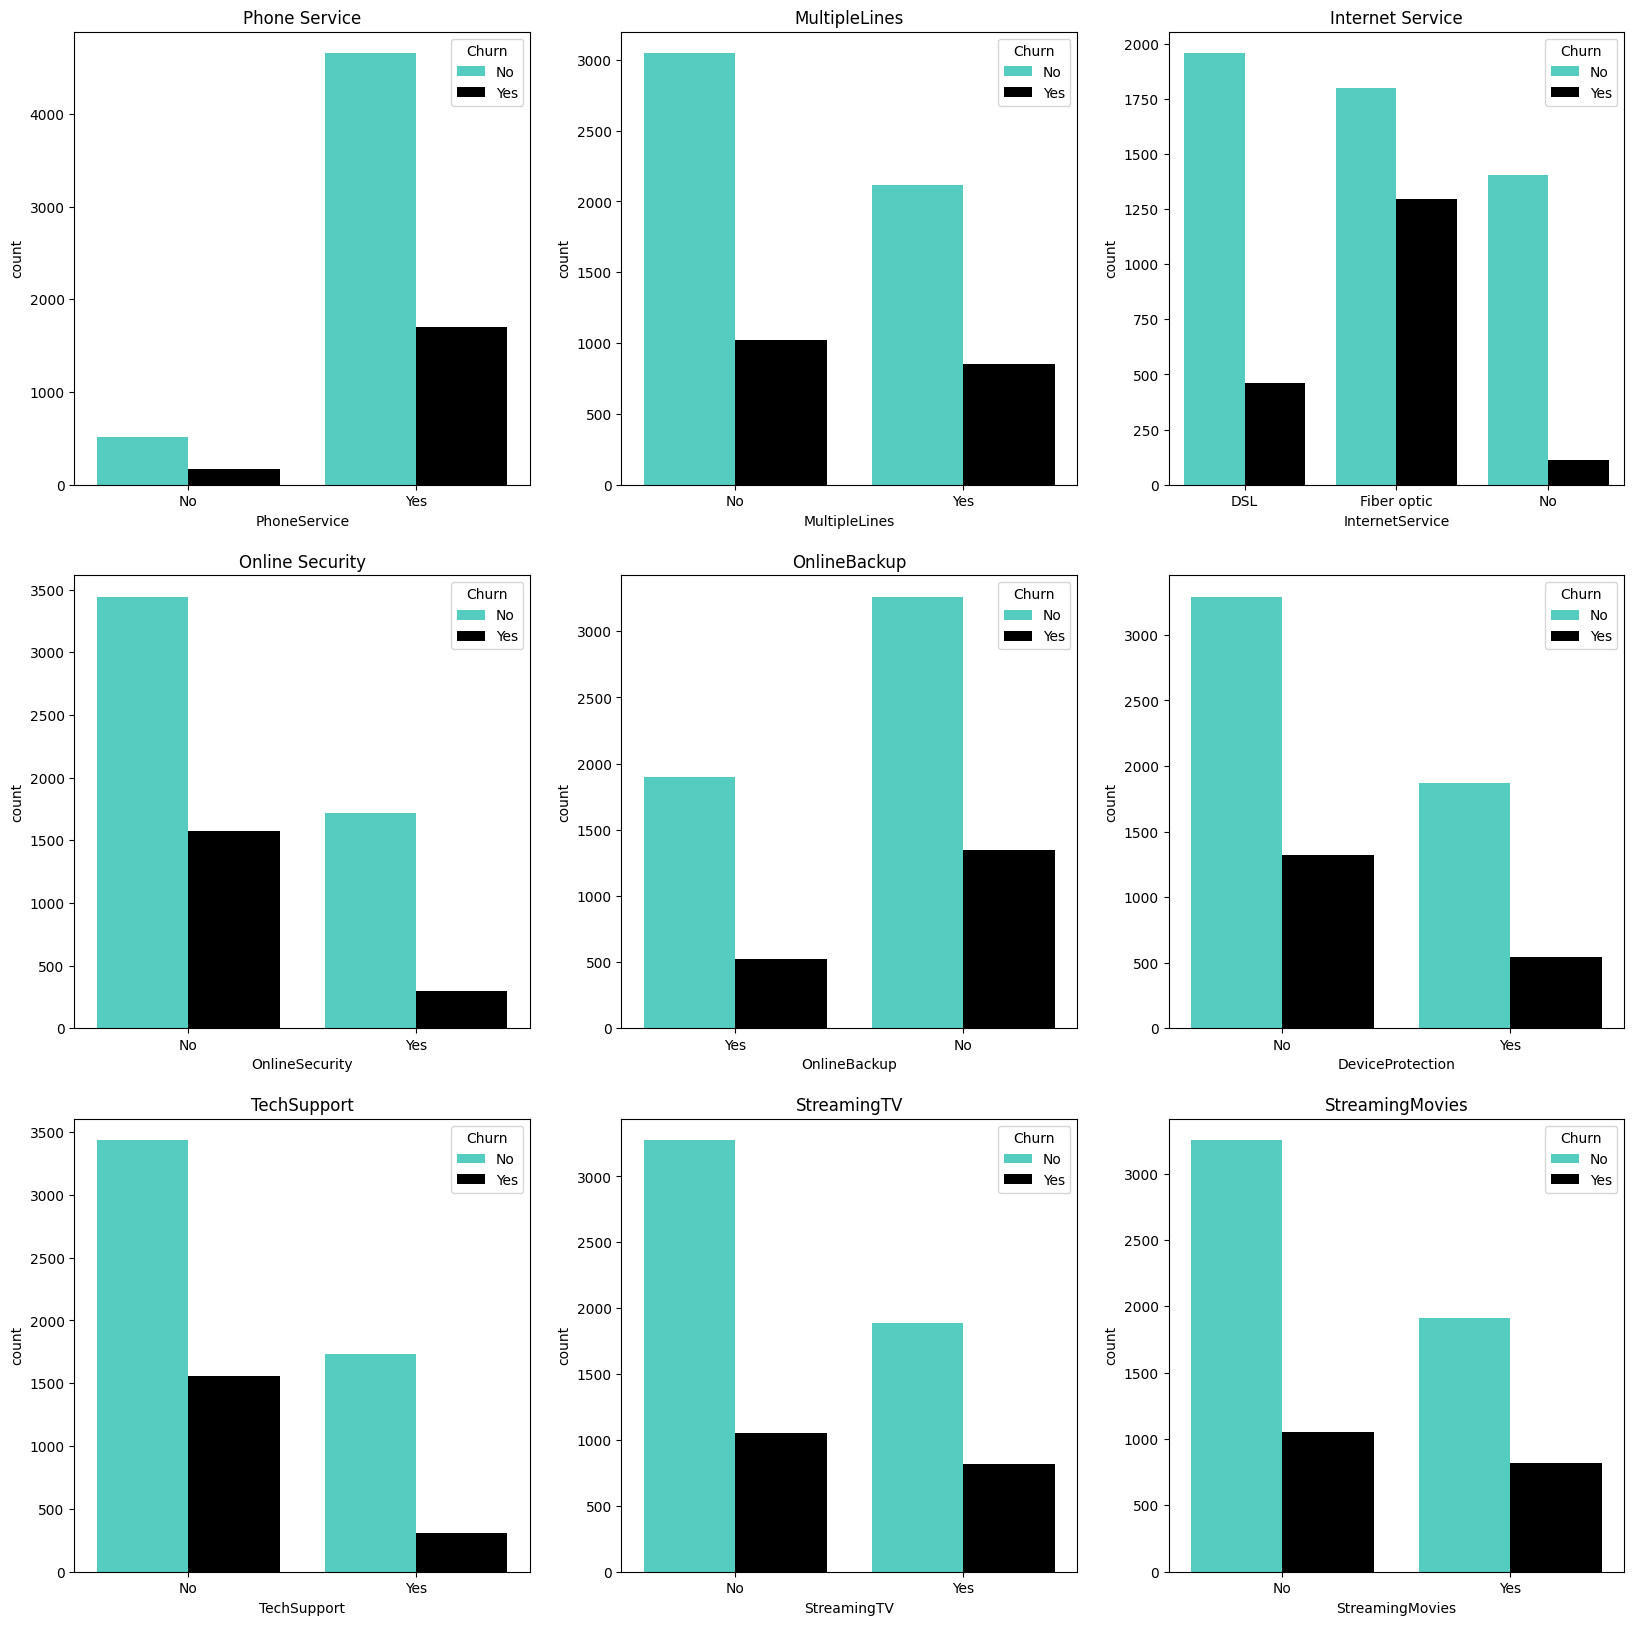

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(20,20))
color=['turquoise','black']

#phone service
sns.countplot(x='PhoneService',data=df,hue='Churn',palette=color,ax=ax[0,0])
ax[0,0].set_title('Phone Service')

#multiplelines
sns.countplot(x='MultipleLines',data=df,hue='Churn',palette=color,ax=ax[0,1])
ax[0,1].set_title('MultipleLines')

#internet service
sns.countplot(x='InternetService',data=df,hue='Churn',palette=color,ax=ax[0,2])
ax[0,2].set_title('Internet Service')

#online security service
sns.countplot(x='OnlineSecurity',data=df,hue='Churn',palette=color,ax=ax[1,0])
ax[1,0].set_title('Online Security')

#online backup
sns.countplot(x='OnlineBackup',data=df,hue='Churn',palette=color,ax=ax[1,1])
ax[1,1].set_title('OnlineBackup')

#Device protection
sns.countplot(x='DeviceProtection',data=df,hue='Churn',palette=color,ax=ax[1,2])
ax[2,0].set_title('Device protection')

#tech support

sns.countplot(x='TechSupport',data=df,hue='Churn',palette=color,ax=ax[2,0])
ax[2,0].set_title('TechSupport')

#streaming TV
sns.countplot(x='StreamingTV',data=df,hue='Churn',palette=color,ax=ax[2,1])
ax[2,1].set_title('StreamingTV')

#Streaming Movies
sns.countplot(x='StreamingMovies',data=df,hue='Churn',palette=color,ax=ax[2,2])
ax[2,2].set_title('StreamingMovies')




These graphs visualizes the relation between customer churn based on services opted by
the customer.
churn count is higher for the customers, who have taken
multiple lines.
the customers with streaming services have lower churn count

**TENURE/CONTRACT AND CHURN**

Text(0.5, 1.0, 'Contract Type and Churn')

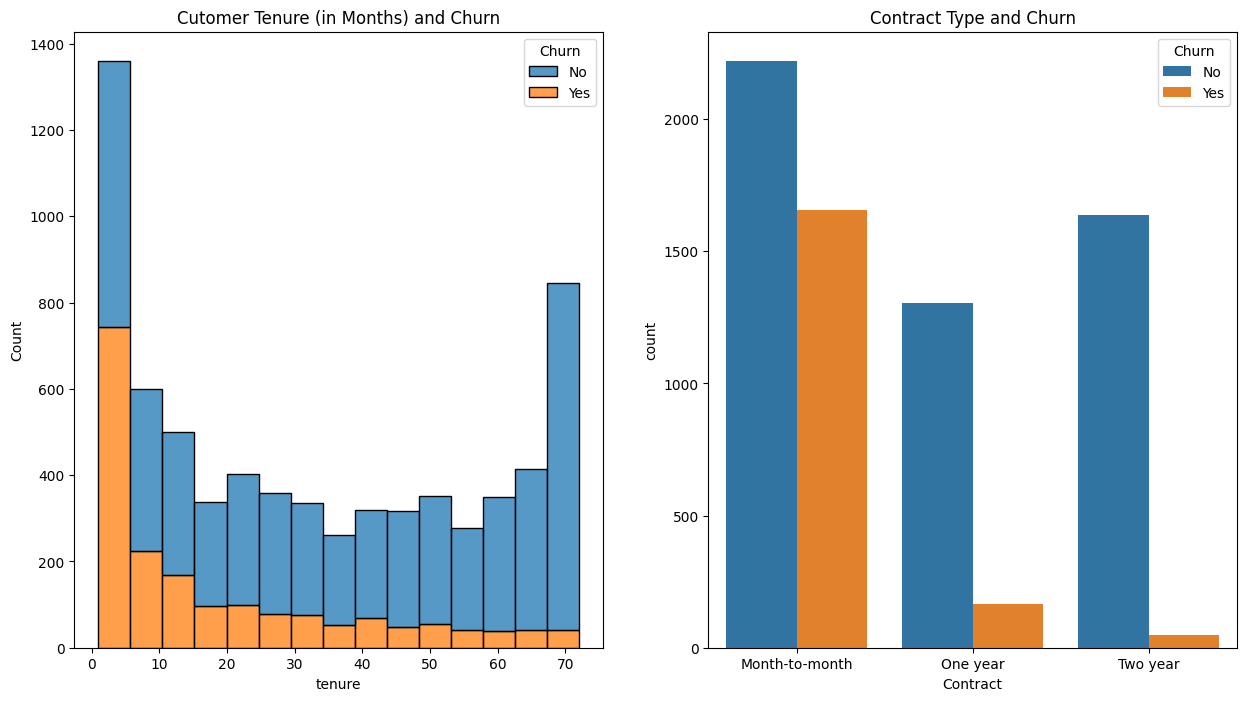

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(x = 'tenure', data = df, ax= ax[0], hue = 'Churn', multiple = 'stack').set_title('Cutomer Tenure (in Months) and Churn')
sns.countplot(x = 'Contract', data = df, ax= ax[1], hue = 'Churn').set_title('Contract Type and Churn')


The customers with
shorter tenure or tenure less than 5 months have higher churn count.customer with long tenure have lowest churn rate,and cutsomer with month to month contract have highest churn count than one or more year contract

**CHARGES AND CHURN**

Text(0.5, 1.0, 'Total Charges')

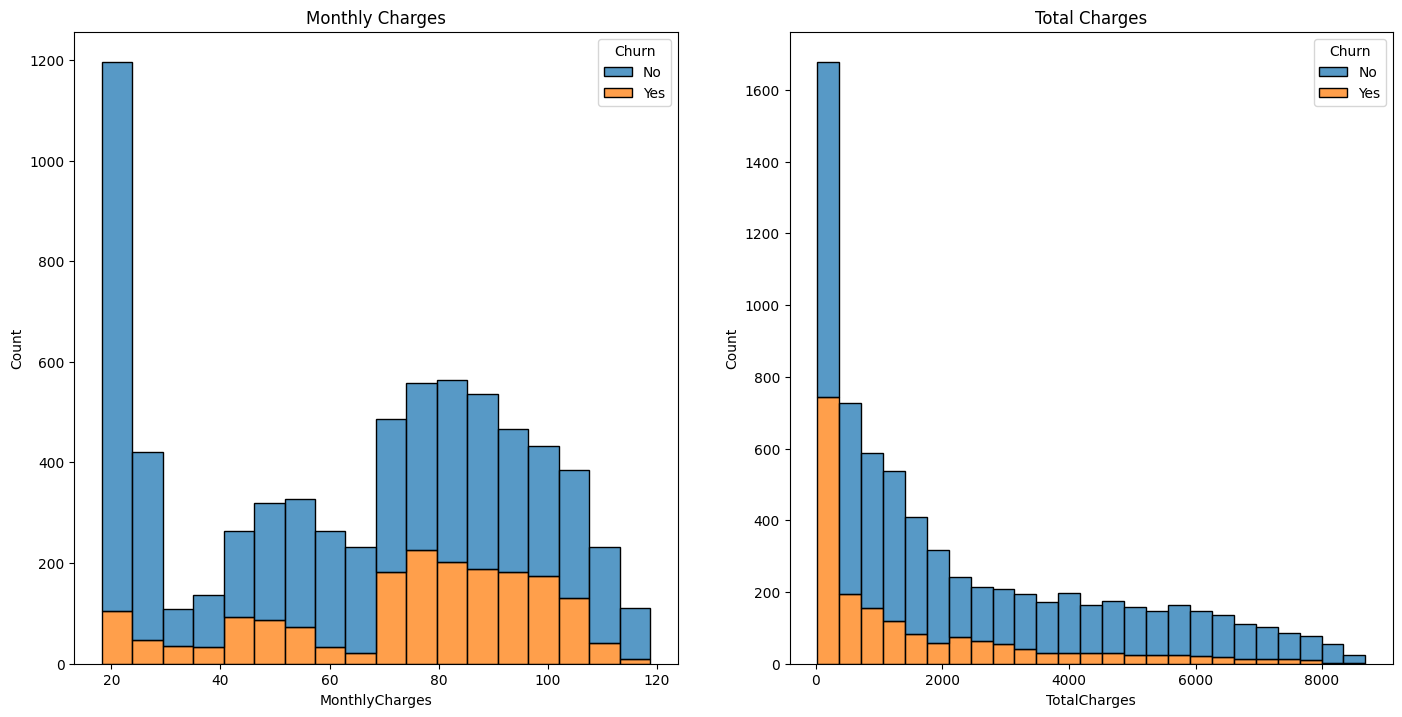

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
fig.tight_layout(pad=5.0)
sns.histplot(x = 'MonthlyCharges', data = df, ax= ax[0], hue = 'Churn', multiple = 'stack').set_title('Monthly Charges')
sns.histplot(x = 'TotalCharges', data = df, ax= ax[1], hue = 'Churn', multiple = 'stack').set_title('Total Charges')

Customer with higher monthly charges have higher churn count,But customer with highest Total charges have the lower churn count.This could be possible when the customer has a long tenure and use lot of services.Therefore the company sholud focus on lowering the monthly charges in order to reduce churn count.

In [ ]:
# Mean of monthly charges for churned and retained customers
mean_monthly_charges_churned = df[df['Churn']== 'Yes']['MonthlyCharges'].mean()
mean_monthly_charges_retained = df[df['Churn'] == 'No']['MonthlyCharges'].mean()


print(f"Mean Monthly Charges for Churned Customers: {mean_monthly_charges_churned:.2f}")
print(f"Mean Monthly Charges for Retained Customers: {mean_monthly_charges_retained:.2f}")

Mean Monthly Charges for Churned Customers: 74.44
Mean Monthly Charges for Retained Customers: 61.31


In [ ]:
# Calculation of sum monthly charges by customer churn
monthly_charges_by_churn = df.groupby('Churn')['MonthlyCharges'].sum().reset_index()
print(monthly_charges_by_churn)


  Churn  MonthlyCharges
0    No       316530.15
1   Yes       139130.85


**PAYMENT METHOD BY CUSTOMER CHURN**

Text(0.5, 1.0, 'Payment method by Churn')

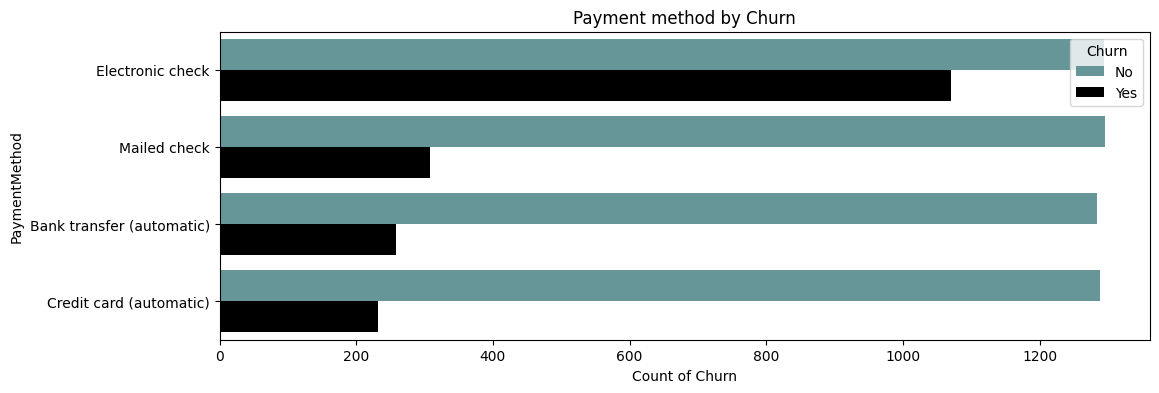

In [ ]:
# Payment method by customer churn
plt.figure(figsize=(12,4))
color=['cadetblue','black']
sns.countplot(data=df, y = 'PaymentMethod', hue = 'Churn',palette=color)
plt.xlabel('Count of Churn')
plt.title('Payment method by Churn')

Most of churn customers using electronic check for payment.

**CORRELATION**

Correlation in machine learning refers to the statistical relationship between two or more variables. It measures how closely the values of these variables are related to each other. Correlation is often used to understand the association between features (independent variables) and the target variable (dependent variable) in a dataset

In [ ]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


**GRAPHICAL REPRESENTATION OF CORRELATION  (HEAT MAP)**

<Axes: >

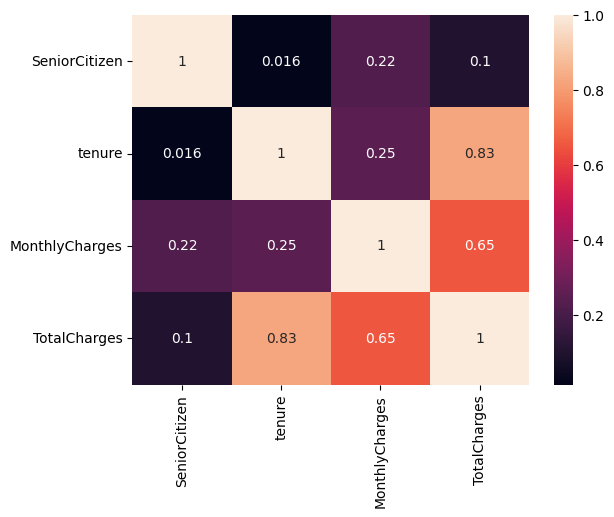

In [ ]:
sns.heatmap(df.corr(),annot=True)

**CHECKING OUTLIERS**

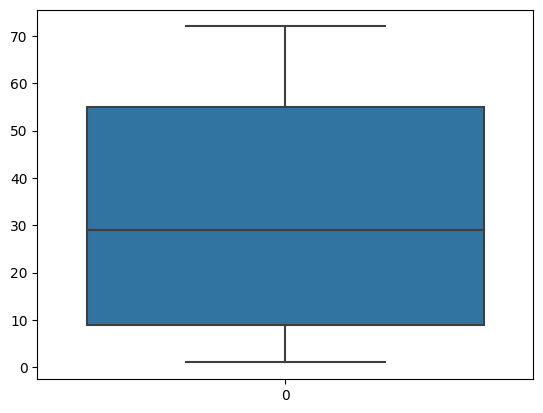

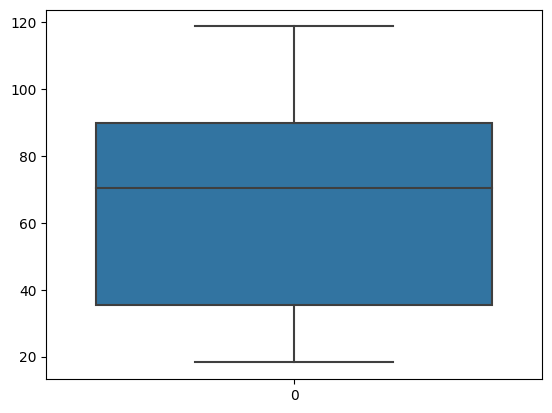

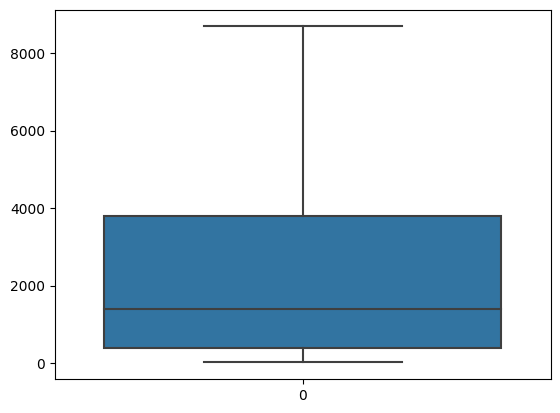

In [ ]:
lst1=['tenure','MonthlyCharges','TotalCharges']
for i in lst1:
    sns.boxplot(df[i])
    plt.show()

**LABEL ENCODING**

In [ ]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
#colums for label encoding
cols = df.columns[df.dtypes == 'object']
#Label encoder object
le = LabelEncoder()
#Label encoding the columns
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique(), '\n')

gender [0 1] 

Partner [1 0] 

Dependents [0 1] 

PhoneService [0 1] 

MultipleLines [0 1] 

InternetService [0 1 2] 

OnlineSecurity [0 1] 

OnlineBackup [1 0] 

DeviceProtection [0 1] 

TechSupport [0 1] 

StreamingTV [0 1] 

StreamingMovies [0 1] 

Contract [0 1 2] 

PaperlessBilling [1 0] 

PaymentMethod [2 3 0 1] 

Churn [0 1] 



**X AND Y SEPERATION**

In [ ]:
x=df.drop(columns='Churn',axis=1)
y=df['Churn']
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

**`FEATURE SCALING`**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
sc_x=mm.fit_transform(x)
sc_x

array([[0.        , 0.        , 1.        , ..., 0.66666667, 0.11542289,
        0.0012751 ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.38507463,
        0.21586661],
       [1.        , 0.        , 0.        , ..., 1.        , 0.35422886,
        0.01031041],
       ...,
       [0.        , 0.        , 1.        , ..., 0.66666667, 0.11293532,
        0.03780868],
       [1.        , 1.        , 1.        , ..., 1.        , 0.55870647,
        0.03321025],
       [1.        , 0.        , 0.        , ..., 0.        , 0.86965174,
        0.78764136]])

**`SPLIT DATA INTO TRAINING AND TESTING SETS`**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(sc_x,y,test_size=0.3,random_state=42)


In [ ]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Here, we can see that accuracy of the dataset is pretty good but this is an imbalanced data set. So the chance of false prediction in the class with lower value counts is high. Inorder to rectify that problem, we use the oversampling method

**`BALANCED DATASET--OVER SAMPLING`**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
y_train_resampled.value_counts()

1    3614
0    3614
Name: Churn, dtype: int64

In [ ]:
mm=MinMaxScaler()
sc_x1=mm.fit_transform(x_train_resampled)
sc_x1

array([[0.        , 0.        , 0.        , ..., 1.        , 0.40109616,
        0.06012036],
       [1.        , 0.        , 0.        , ..., 0.66666667, 0.43148979,
        0.18037261],
       [0.        , 0.        , 0.        , ..., 0.66666667, 0.51519681,
        0.02326346],
       ...,
       [1.        , 0.        , 0.        , ..., 0.43142225, 0.88224269,
        0.49283617],
       [0.        , 0.        , 0.        , ..., 0.66666667, 0.60096037,
        0.05156806],
       [1.        , 0.        , 0.05846709, ..., 1.        , 0.33049549,
        0.09687183]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(sc_x1,y_train_resampled)

## **`MODEL BUILDING`**






>**K Nearest Neighbor Classifier**

> **SVM**

> **DECISION TREE**

> **RANDOM FOREST**

> **NAIVE BAYES**
























### **`MODEL EVALUATION TOOLS`**

---




> ACCURACY SCORE

> CLASSIFICATION REPORT

> CONFUSION MATRIX







**importing classification report and accuracy score for model evaluation**

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

**1.KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

**Hyperparameter Tuning using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import distance
np.random.seed(42)

param={'n_neighbors':[1,3,5,7,9],
       'weights':['uniform','distance'],
       'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
gsv_knn=GridSearchCV(knn,param,cv=10,scoring='accuracy')

gsv_knn.fit(x_train,y_train)

#Best parameters
print(gsv_knn.best_params_)

{'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'uniform'}


**MODEL CREATION**

In [ ]:
knn=KNeighborsClassifier(algorithm='ball_tree',n_neighbors=1,weights='uniform')
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)


**MODEL EVALUATION**

In [ ]:
#accuracy score
knn_acc=accuracy_score(y_test,knn_pred)
knn_acc

0.8206972883231876

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       916
           1       0.78      0.89      0.83       891

    accuracy                           0.82      1807
   macro avg       0.83      0.82      0.82      1807
weighted avg       0.83      0.82      0.82      1807



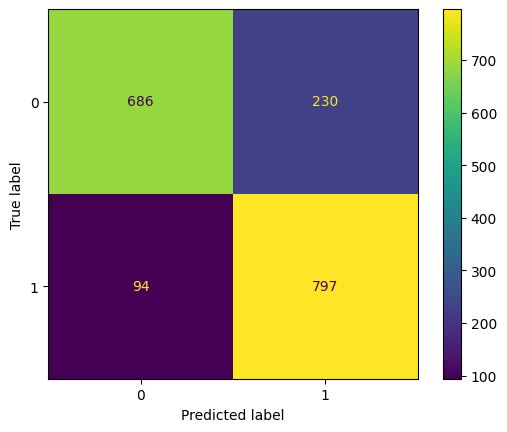

In [ ]:
#classification report and confusion matrix
print(classification_report(y_test,knn_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,knn_pred))

**2. SVM (SUPPORT VECTOR MACHINE)**

In [ ]:
from sklearn.svm import SVC
svm=SVC()

**Hyperparameter Tuning using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_svm ={'C': [0.1, 1, 10],
'kernel': ['linear', 'rbf'],
'gamma': ['scale', 'auto', 0.1,1]}

grid_search_svm = GridSearchCV(svm, param_grid_svm, scoring='recall', cv=10)
grid_search_svm.fit(x_train, y_train)

print(grid_search_svm.best_params_)


{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


**MODEL CREATION**

In [ ]:
svm=SVC(C=10,gamma=1,kernel='rbf')
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)


**MODEL EVALUATION**

In [ ]:
#accuracy score
svm_acc=accuracy_score(y_test,svm_pred)
svm_acc

0.8494742667404538

              precision    recall  f1-score   support

           0       0.89      0.81      0.84       916
           1       0.82      0.89      0.85       891

    accuracy                           0.85      1807
   macro avg       0.85      0.85      0.85      1807
weighted avg       0.85      0.85      0.85      1807



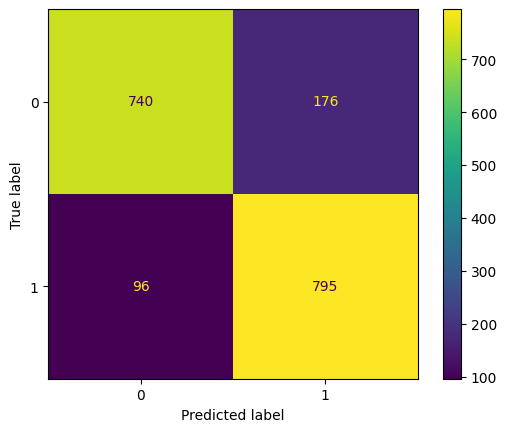

In [ ]:
#classification report and confusion matrix
print(classification_report(y_test,svm_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,svm_pred))

**3. DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Decision Tree Classifier Object
dtree = DecisionTreeClassifier()

**Hyperparameter Tuning using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameter grid
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Decision Tree Classifier
grid_search_d = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search_d.fit(x_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=2)

In [ ]:
#Best parameters
print(grid_search_d.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 42}


**MODEL CREATION**

In [ ]:
dtree  = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8,min_samples_split=2, random_state=42)
dtree.fit(x_train,y_train)
dtree_pred=dtree.predict(x_test)


**MODEL EVALUATION**

In [ ]:
dtree_acc=accuracy_score(y_test,dtree_pred)
dtree_acc

0.8007747648035418

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       916
           1       0.79      0.81      0.80       891

    accuracy                           0.80      1807
   macro avg       0.80      0.80      0.80      1807
weighted avg       0.80      0.80      0.80      1807



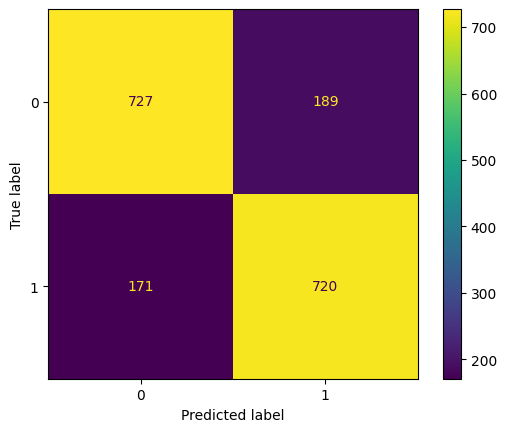

In [ ]:
#classification report and confusion matrix
print(classification_report(y_test,dtree_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,dtree_pred))

**4.RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Hyperparameter Tuning using GridSearchCV**

In [ ]:
param_rf = {'n_estimators': [50,100,150],
            'max_depth': [10,20,30,40,50]
}

grid_search_rf = GridSearchCV(rf, param_rf, scoring ='accuracy', cv=10)
grid_search_rf.fit(x_train, y_train)


print(grid_search_rf.best_params_)

{'max_depth': 50, 'n_estimators': 150}


**MODEL CREATION**

In [ ]:
rf=RandomForestClassifier(max_depth=50,n_estimators=150)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)


**MODEL EVALUATION**

In [ ]:
#accuracy score
rf_acc=accuracy_score(y_test,rf_pred)
rf_acc

0.8428334255672385

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       916
           1       0.84      0.85      0.84       891

    accuracy                           0.84      1807
   macro avg       0.84      0.84      0.84      1807
weighted avg       0.84      0.84      0.84      1807



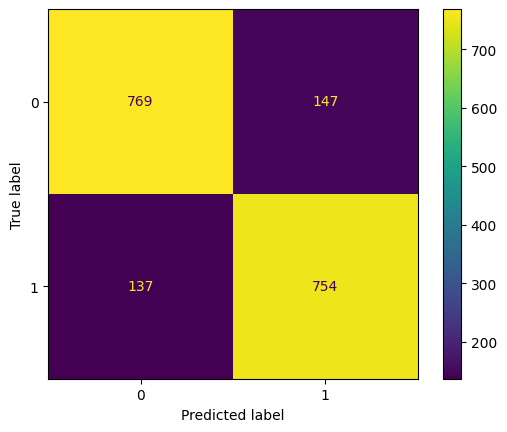

In [ ]:
#classification report and confusion matrix
print(classification_report(y_test,rf_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,rf_pred))

**5. NAIVE BAYES CLASSIFIER**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_pred=nb.predict(x_test)

**MODEL EVALUATION**

In [ ]:
nb_acc=(accuracy_score(y_test,nb_pred))
nb_acc

0.7714443829551744

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       916
           1       0.74      0.82      0.78       891

    accuracy                           0.77      1807
   macro avg       0.77      0.77      0.77      1807
weighted avg       0.77      0.77      0.77      1807



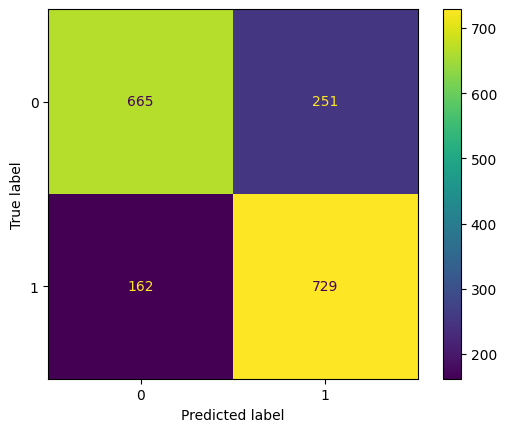

In [ ]:
#classification report and confusion matrix
print(classification_report(y_test,nb_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,nb_pred))

**ACCURACY SCORE COMPARISON BETWEEN MODELS**

In [ ]:
model=['KNN','SVM','DECISION TREE','RANDOM FOREST','NAIVE BAYES']
accuracy_scores=[knn_acc,svm_acc,dtree_acc,rf_acc,nb_acc]
accuracy_scores

[0.8206972883231876,
 0.8494742667404538,
 0.8007747648035418,
 0.8428334255672385,
 0.7714443829551744]

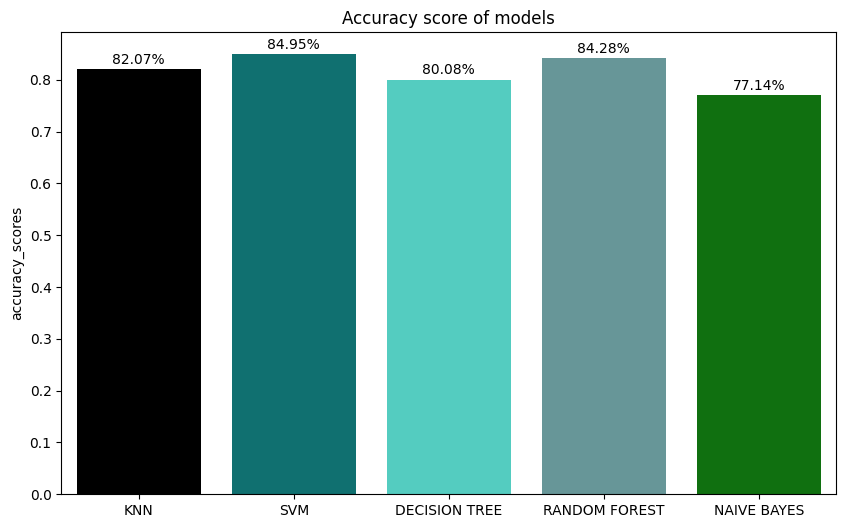

In [ ]:
color=['black','teal','turquoise','cadetblue','green']
plt.figure(figsize=(10,6))
sns.barplot(x=model,y=accuracy_scores,palette=color)
plt.ylabel('accuracy_scores')
plt.title('Accuracy score of models')
# Adding percentage labels
for i, score in enumerate(accuracy_scores):
    plt.text(i, score +0.01, f'{score*100:.2f}%' , ha = 'center')
plt.show()

By plotting accuracy score with percentage label,it is clear that support vector machine classifier and Random forest classifier shows highest accurcy score than other models.

**DISTRIBUTION PLOT(Y_TEST V/S Y_PREDICTED VALUES)**

<Axes: title={'center': 'RANDOM FORSET'}, xlabel='Churn', ylabel='Density'>

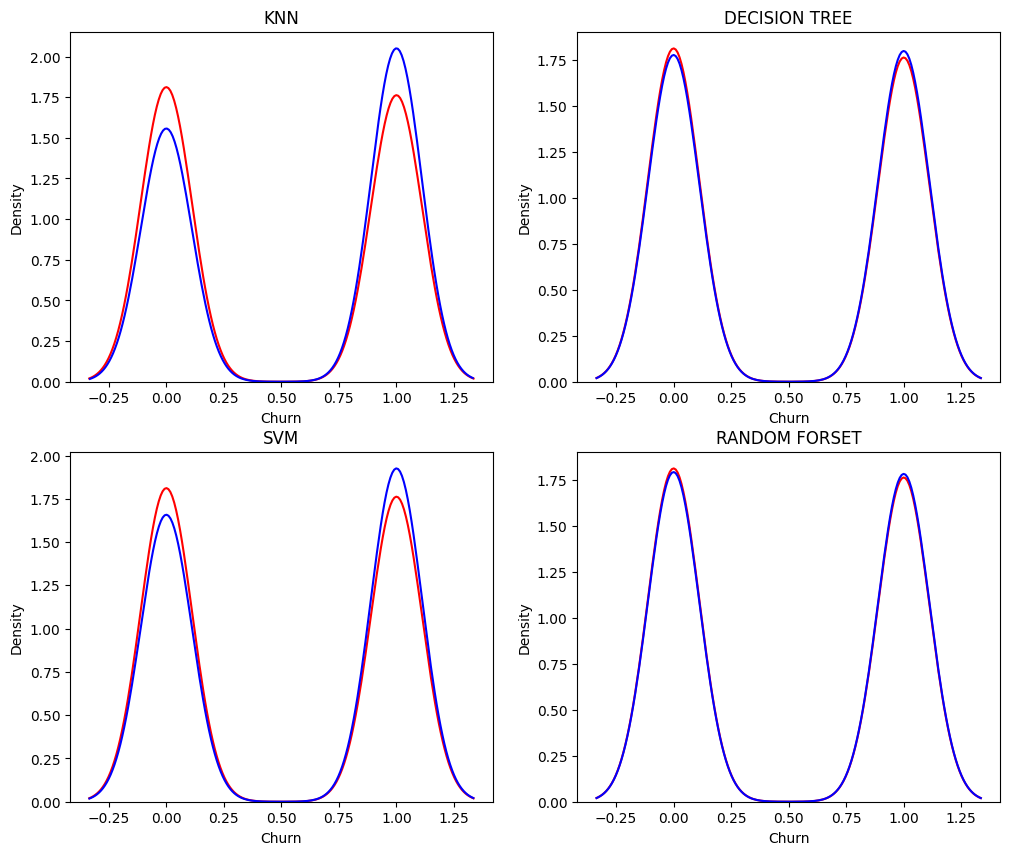

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

#KNN
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[0,0]).set_title('KNN')
sns.distplot(knn_pred, hist=False, color="b", label="Fitted Values" , ax=ax[0,0])


#DECISION TREE
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[0,1]).set_title('DECISION TREE')
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax[0,1])


#SVM
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[1,0]).set_title('SVM')
sns.distplot(svm_pred, hist=False, color="b", label="Fitted Values" , ax=ax[1,0])


# #RANDOM FOREST
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[1,1]).set_title('RANDOM FORSET')
sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax[1,1])

**Distribution plots allow you to visually compare the distribution of your model's predictions (fitted values) with the distribution of the actual values.it provide a visual way to assess the goodness of fit of your model, understand the quality of predictions, and identify potential issues or areas for improvement.**

**FEATURE IMPORTANCE**

Feature importance is typically associated with tree-based models like Random Forest and Decision Trees, where you can calculate the importance of each feature based on how much they contribute to the model's predictive performance.

Text(0.5, 1.0, 'Random Forest Classifier Feature Importance')

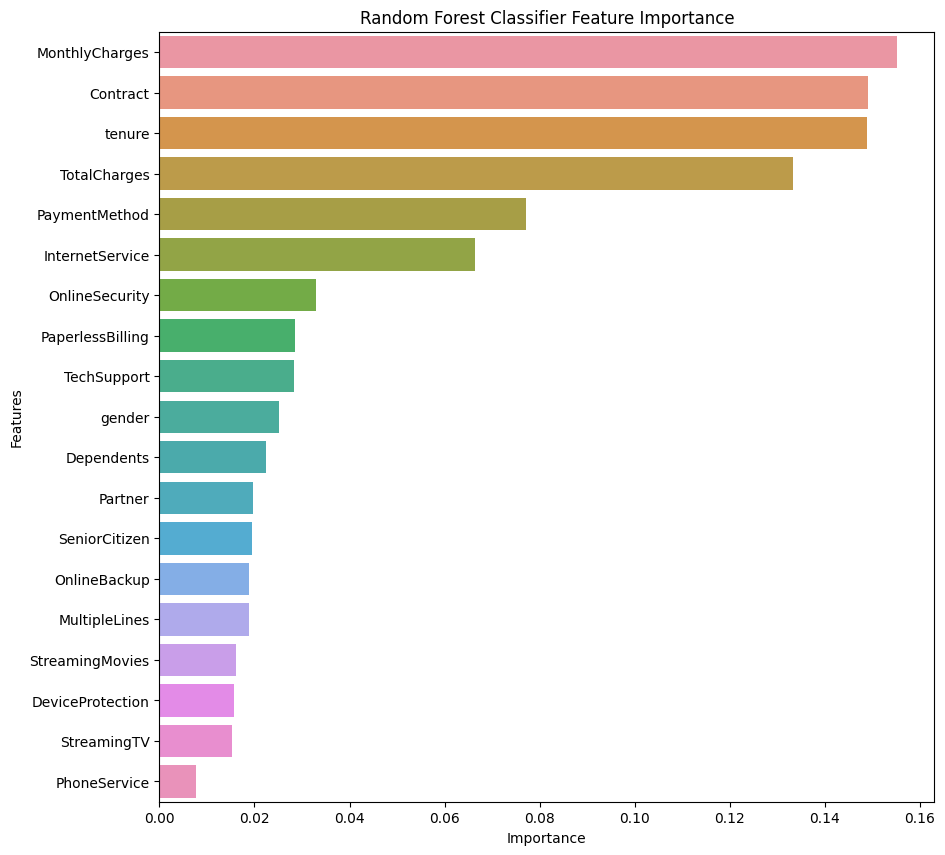

In [ ]:
# Random Forest Classifier Feature Importance
plt.figure(figsize=(10, 10))
x_train = pd.DataFrame(x_train, columns = x.columns)
feature_df = pd.DataFrame({'Features': x_train.columns, 'Importance': rf.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df).set_title('Random Forest Classifier Feature Importance')


Total charges,Monthly charges,tenure,contract are the most important features for predicting the customer churn hence company should focus on this features to reduce churn rate

# **`CONCLUSION`**




By analysing this data set(visualization of churn count)it is clear that the churning rate is less compared to the non churning rate. According to this, the company is quite good at retaining it's coustomers.From the feature importance it is clear that the tenure, monthly charges,contract and total charges are
the most important features for predicting the customer churn. Therefore, the  company should effectively focus on features to reduce existing churn count.





I have used five models - K Nearest Neighbor classifier, Naive bayes classifier,Support vector machine(SVM),Decision tree classifier, Random Forest Classifier. The Support vector machine Classifier and Random Forest Classifier shows the highest accuracy score and F1 Score.
Therefore, the both models are good fit for predicting the customer churn.









# **`FUTURE IMPORTANCE OF TELECOM CUSTOMER CHURN PREDICTION`**




**1.Increased Competition:** The telecommunications industry is highly competitive, with numerous providers offering similar services. To retain and attract customers, telecom companies need to understand and predict churn, so they can take proactive measures to reduce it.


**2.Customer Acquisition Costs:** Acquiring new customers is often more expensive than retaining existing ones. Predicting and reducing churn can help telecom companies save on customer acquisition costs by focusing on retaining their current customer base.

**3.Technological Advancements:** As new technologies and services emerge in the telecom industry (e.g., 5G, IoT, and AI-powered services), predicting and managing customer churn becomes even more critical. Customers may churn if they perceive that a competitor offers better technology or services.

**4.Data Analytics and AI:** Advances in data analytics and artificial intelligence make it easier for telecom companies to collect, analyze, and interpret customer data to identify churn indicators and create personalized retention strategies.

**5.Customer Expectations:** Customers have increasingly high expectations for the quality of telecom services, including network reliability, customer support, and value for money. Predicting churn allows companies to address these expectations and reduce dissatisfaction.

**6.Revenue Protection:** Churn can lead to revenue loss. By accurately predicting churn and taking measures to retain customers, telecom companies can protect their revenue streams.

